In [568]:
import pandas as pd
import numpy as np
from tqdm import tqdm 

In [569]:
df_=pd.read_stata('../HRS-HCAP-Classification/HCAPHRS.dta')
df_=df_.set_index('HHID')
df_

,PN,SECU,STRATUM,PWGTR,HCAP16WGTR,PINSAMP,PIWWAVE,PIWYEAR,PMARST,PNURSHM,...,x3x4,x3x5,x3x6,x3x7,x4x5,x4x6,x4x7,x5x6,x5x7,x6x7
HHID,,,,,,,,,,,,,,,,,,,,,
010001,010,2.0,1.0,7558.0,NaN,1.0,1.0,2016.0,4.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,0.0,0.0,0.0,0.0
010003,030,2.0,1.0,6900.0,NaN,1.0,1.0,2016.0,3.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,4.0,0.0,0.0,0.0
010004,040,2.0,1.0,5836.0,17148.0,1.0,1.0,2016.0,3.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,0.0,0.0,0.0,0.0
010013,040,2.0,1.0,5768.0,NaN,1.0,1.0,2016.0,2.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,1.0,0.0,0.0,0.0
010038,010,2.0,2.0,6573.0,16431.0,1.0,1.0,2016.0,1.0,5.0,...,0.0,0.0,0.0,0.006944,-0.056281,-0.045795,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923525,010,1.0,51.0,1214.0,NaN,1.0,1.0,2016.0,1.0,5.0,...,0.0,0.0,0.0,0.000000,0.943719,-0.045795,2.0,0.0,2.0,0.0
923525,020,1.0,51.0,1477.0,NaN,1.0,1.0,2017.0,1.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,0.0,0.0,0.0,0.0
952836,010,2.0,12.0,1041.0,NaN,1.0,1.0,2016.0,2.0,5.0,...,0.0,0.0,0.0,-0.000000,-0.056281,0.954205,-6.0,0.0,-0.0,-6.0


In [570]:
df_.columns

Index(['PN', 'SECU', 'STRATUM', 'PWGTR', 'HCAP16WGTR', 'PINSAMP', 'PIWWAVE',
       'PIWYEAR', 'PMARST', 'PNURSHM', 'PPROXY', 'rage', 'PA019', 'PAGE',
       'female', 'black', 'hisp', 'SCHLYRS', 'HISPANIC', 'RACE', 'vdori',
       'vdlfl1z', 'vdlfl2', 'vdlfl3', 'vdwdimmz', 'vdwddelz', 'vdexf7z',
       'vdsevens', 'vdcount', 'nPG014', 'nPG021', 'nPG023', 'nPG030', 'nPG040',
       'nPG041', 'nPG044', 'nPG047', 'nPG050', 'nPG059', 'PD102', 'jorm',
       'vs1hcapdx', 'vs1hcapdxeap', 'nonzeroweight', 'inHCAP', 'age65up',
       'cogfunction2016', 'PrDem', 'PrCIND', 'PrNorm', 'Cog', 'CogSd',
       'Hudomiet_classification', 'SCHLYRSimp', 'DEGREE', 'spage1', 'spage2',
       'spage3', 'rage_cat', 'Sex', 'RaceAndEthnicity',
       'Educational_Attainment', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7',
       'x1x4', 'x1x5', 'x1x6', 'x1x7', 'x2x4', 'x2x5', 'x2x6', 'x2x7', 'x3x4',
       'x3x5', 'x3x6', 'x3x7', 'x4x5', 'x4x6', 'x4x7', 'x5x6', 'x5x7', 'x6x7'],
      dtype='object')

In [571]:
cols_ignore=['SECU', 'PN','STRATUM','PINSAMP', 'HCAP16WGTR','PIWWAVE',
             'PIWYEAR','PPROXY','rage','PA019','PAGE','x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7',
       'x1x4', 'x1x5', 'x1x6', 'x1x7', 'x2x4', 'x2x5', 'x2x6', 'x2x7', 'x3x4',
       'x3x5', 'x3x6', 'x3x7', 'x4x5', 'x4x6', 'x4x7', 'x5x6', 'x5x7', 'x6x7','SCHLYRSimp',
          'spage1', 'spage2','spage3' ]

In [572]:
df_=df_[['rage', 'female', 'black', 'hisp', 'SCHLYRS', 'vdori', 'vdlfl1z',
       'vdlfl2', 'vdlfl3', 'vdwdimmz', 'vdwddelz', 'vdexf7z', 'vdsevens',
       'vdcount']]

In [573]:
df_=df_[df_.rage>65]

In [574]:
#df_[feature_names].to_csv('groundtruth.csv')

In [575]:
df_.columns

Index(['rage', 'female', 'black', 'hisp', 'SCHLYRS', 'vdori', 'vdlfl1z',
       'vdlfl2', 'vdlfl3', 'vdwdimmz', 'vdwddelz', 'vdexf7z', 'vdsevens',
       'vdcount'],
      dtype='object')

In [576]:
#df_['bineduc']=df_['Educational_Attainment'].isin(['Education beyond college','Some college'])+0
#df_=df_.drop('Educational_Attainment',axis=1)

In [577]:
df=df_.copy()
N=100
# Step 1: Select columns with > N unique entries
cols_to_process = [col for col in df.columns if df[col].nunique() > N]

# Step 2: Round/cluster each selected column to N closest values
for col in cols_to_process:
    unique_vals = np.linspace(df[col].min(), df[col].max(), N)  # N evenly spaced values
    df[col] = df[col].apply(lambda x: unique_vals[np.argmin(np.abs(unique_vals - x))])
df

,rage,female,black,hisp,SCHLYRS,vdori,vdlfl1z,vdlfl2,vdlfl3,vdwdimmz,vdwddelz,vdexf7z,vdsevens,vdcount
HHID,,,,,,,,,,,,,,
010001,76.0,0.0,0.0,0.0,12.0,4.0,0.068226,2.0,2.0,0.500000,0.500000,0.302902,4.0,1.0
010004,70.0,1.0,0.0,0.0,12.0,4.0,0.261388,2.0,2.0,0.699957,0.699949,0.999887,4.0,1.0
010013,68.0,1.0,0.0,0.0,13.0,4.0,0.159125,2.0,2.0,0.500000,0.500000,0.685672,5.0,1.0
010038,79.0,0.0,0.0,0.0,16.0,3.0,0.170488,2.0,2.0,0.699957,0.599975,0.999887,5.0,1.0
010038,73.0,1.0,0.0,0.0,16.0,4.0,0.193213,2.0,2.0,0.599979,0.400025,0.919905,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920697,66.0,1.0,1.0,0.0,12.0,4.0,0.159125,2.0,2.0,0.799936,0.599975,0.622829,3.0,1.0
920753,73.0,0.0,1.0,0.0,12.0,4.0,0.306838,2.0,2.0,0.500000,0.400025,0.320041,3.0,1.0
920760,67.0,1.0,1.0,0.0,13.0,4.0,0.000051,2.0,1.0,0.400021,0.200076,0.457153,3.0,1.0


In [578]:
df=df.astype(str).replace('nan','')


In [579]:
df

,rage,female,black,hisp,SCHLYRS,vdori,vdlfl1z,vdlfl2,vdlfl3,vdwdimmz,vdwddelz,vdexf7z,vdsevens,vdcount
HHID,,,,,,,,,,,,,,
010001,76.0,0.0,0.0,0.0,12.0,4.0,0.06822555059325228,2.0,2.0,0.5,0.5,0.30290184642378326,4.0,1.0
010004,70.0,1.0,0.0,0.0,12.0,4.0,0.26138780427521835,2.0,2.0,0.6999574148542577,0.6999491395485948,0.9998866213889556,4.0,1.0
010013,68.0,1.0,0.0,0.0,13.0,4.0,0.15912543467888338,2.0,2.0,0.5,0.5,0.6856721736587549,5.0,1.0
010038,79.0,0.0,0.0,0.0,16.0,3.0,0.17048792018958725,2.0,2.0,0.6999574148542577,0.5999745697742974,0.9998866213889556,5.0,1.0
010038,73.0,1.0,0.0,0.0,16.0,4.0,0.19321289121099505,2.0,2.0,0.5999787074271288,0.4000254302257026,0.9199047619667227,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920697,66.0,1.0,1.0,0.0,12.0,4.0,0.15912543467888338,2.0,2.0,0.7999361222813866,0.5999745697742974,0.6228292841127148,3.0,1.0
920753,73.0,0.0,1.0,0.0,12.0,4.0,0.3068377463180339,2.0,2.0,0.5,0.4000254302257026,0.32004081629997605,3.0,1.0
920760,67.0,1.0,1.0,0.0,13.0,4.0,5.063752902895717e-05,2.0,1.0,0.40002129257287117,0.2000762906771077,0.4571525753095181,3.0,1.0


In [580]:
S=9000
df_training=df.sample(S)
training_index=df_training.index.values
df_test = df.drop(df_training.index)

In [581]:
X=df_training.values.astype(str)
feature_names=df_training.columns
feature_names

Index(['rage', 'female', 'black', 'hisp', 'SCHLYRS', 'vdori', 'vdlfl1z',
       'vdlfl2', 'vdlfl3', 'vdwdimmz', 'vdwddelz', 'vdexf7z', 'vdsevens',
       'vdcount'],
      dtype='object')

In [582]:
from quasinet.qnet import load_qnet
from quasinet.qnet import save_qnet
from quasinet.qsampling import qsample
from quasinet.qnet import qdistance, qdistance_matrix
from quasinet.qnet import Qnet

In [583]:
%%time
model=Qnet(feature_names=feature_names,alpha=.1)
model.fit(X)
save_qnet(model,'modelrestricted_65',gz=True)

CPU times: user 25.8 s, sys: 180 ms, total: 26 s
Wall time: 26.1 s


In [460]:
model.training_index=training_index
#save_qnet(model,'modelbin',gz=True)

In [461]:
OUTDIR='treesrestricted_65_p2/'
modelpath='modelrestricted_65_p2.gz'
model=load_qnet(modelpath,gz=True)
model.viz_trees(tree_path=OUTDIR,big_enough_threshold=1,format='png')

In [539]:
NULL=np.array(['']*len(feature_names)).astype('U100')

In [540]:
X_test=df_test.values.astype(str)

In [541]:
def getbp(s):
    # generate a vector summing to 1.0 with zeros where 
    # the response/observation is missing
    # so that we can perturb only in entries which are non-missing
    bp=np.ones(len(s))
    bp[np.where(s=='')[0]]=0
    return bp/bp.sum()

In [590]:
N=100
steps=10

In [543]:
# bad synthetic generation
gensamples_bad=[qsample(s,model,steps=steps,alpha=-1,baseline_prob=getbp(s)) for s in tqdm(X_test[:N])]
ngennoswapq_bad=np.array([qdistance(NULL,s,model,model) for s in tqdm(gensamples_bad)])
gen_noswap_bad_df=pd.DataFrame(gensamples_bad,columns=feature_names)

100%|███████████████████████████████████████| 1000/1000 [00:15<00:00, 65.20it/s]


In [589]:
gensamples1=pd.DataFrame([qsample(s,model,steps=steps,alpha=1,baseline_prob=getbp(s))
                          for s in tqdm(X[:9000])],columns=feature_names)
gensamples2=pd.DataFrame([qsample(s,model,steps=steps,alpha=1,baseline_prob=getbp(s))
                          for s in tqdm(X[:763])],columns=feature_names)

pd.concat([gensamples1,gensamples2]).to_csv('LSM_synthetic_new_65plus.csv')



100%|████████████████████████████████████████| 763/763 [00:04<00:00, 168.61it/s]


In [588]:
# LSM synthetic generation
gensamples=[qsample(s,model,steps=steps,alpha=1,baseline_prob=getbp(s)) for s in tqdm(X[:9000])]
ngennoswapq=np.array([qdistance(NULL,s,model,model) for s in tqdm(gensamples)])
gen_noswap_df=pd.DataFrame(gensamples,columns=feature_names)
gen_noswap_df.to_csv('LSM_synthetic_new_65plus.csv')

 28%|██████████▌                           | 2515/9000 [00:15<00:40, 161.21it/s]


KeyboardInterrupt: 

In [591]:
# original
ngennoswap=np.array([qdistance(NULL,s,model,model) for s in tqdm(X_test[:N])])
gen_test_df = pd.DataFrame(X_test[:N],columns=feature_names)

100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 69.67it/s]


In [592]:
# reading synthpop data
import pandas as pd
import pyreadr

# .rds typically stores a single object; grab the first/only value
res = pyreadr.read_r("../../data/synthpop_synthetic_datasets/synthetic_dataset_40.rds")
obj = next(iter(res.values()))

# If it's a data.frame/tibble, this is a pandas DataFrame already
if isinstance(obj, pd.DataFrame):
    df = obj
else:
    # .rds can hold other objects (vector, list); convert as needed
    # Example: turn an R vector into a DataFrame
    df = pd.DataFrame(obj)

dsynthpop=df.copy()

In [593]:
feature_names

Index(['rage', 'female', 'black', 'hisp', 'SCHLYRS', 'vdori', 'vdlfl1z',
       'vdlfl2', 'vdlfl3', 'vdwdimmz', 'vdwddelz', 'vdexf7z', 'vdsevens',
       'vdcount'],
      dtype='object')

In [594]:
dsynthpop=dsynthpop.drop('group',axis=1)[feature_names]
#dsynthpop.to_csv('synthdata.csv')

In [595]:
Xsyn=dsynthpop.astype(str).replace('nan','').values.astype(str)

In [596]:
ngensynth=np.array([qdistance(NULL,s,model,model) for s in tqdm(Xsyn[:N])])

100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 65.73it/s]


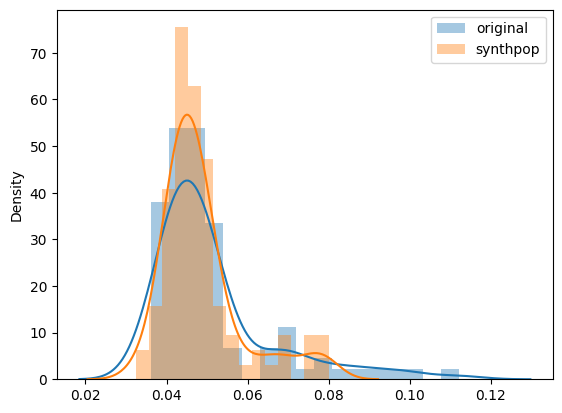

In [597]:
import seaborn as sns
import pylab as plt
sns.distplot(ngennoswap,label='original')
#sns.distplot(ngennoswapq,label='LSM synthetic')
#sns.distplot(ngennoswapq_bad,label='bad synthetic')
sns.distplot(ngensynth,label='synthpop')
plt.legend()

In [552]:
from scipy.stats import ks_2samp

alpha=1e-5
# KS two-sample test
stat, p_val = ks_2samp(ngennoswap,ngennoswapq)
print('comparing original and synthetic data')
print(f"KS Statistic: {stat:.4f}, p-value: {p_val:.4g}")

if p_val < alpha:
    print("Reject null hypothesis: distributions differ.")
else:
    print("Fail to reject null hypothesis: distributions are similar.")

comparing original and synthetic data
KS Statistic: 0.0770, p-value: 0.005307
Fail to reject null hypothesis: distributions are similar.


In [553]:
stat, p_val = ks_2samp(ngennoswapq_bad,ngennoswapq)
print('comparing bad-synthetic and synthetic data')
print(f"KS Statistic: {stat:.4f}, p-value: {p_val:.4g}")

if p_val < alpha:
    print("Reject null hypothesis: distributions differ.")
else:
    print("Fail to reject null hypothesis: distributions are similar.")

comparing bad-synthetic and synthetic data
KS Statistic: 0.3170, p-value: 8.322e-45
Reject null hypothesis: distributions differ.


In [554]:
# synthetic dataframe
Ds_=gen_noswap_df
# original dataframe 
D_=df_training.sample(1000)

In [555]:
# Function to try numeric conversion only if column looks numeric
def safe_to_float(series):
    try:
        # Try converting; if all values become NaN, keep original
        converted = pd.to_numeric(series.replace('', np.nan), errors='coerce')
        if converted.notna().sum() > 0:
            return converted
        else:
            return series
    except:
        return series

# Apply column-wise
D=D_.apply(safe_to_float)
Ds=Ds_.apply(safe_to_float)
Dsynthpop=dsynthpop.apply(safe_to_float)

#D=D[D.rage > 65]
#Ds=Ds[Ds.rage > 65]
#Dsynthpop=Dsynthpop[Dsynthpop.rage > 65]

In [556]:
Dm=D.mean(numeric_only=True)/D.std(numeric_only=True)
Dsm=Ds.mean(numeric_only=True)/D.std(numeric_only=True)
Dsynthpopm=Dsynthpop.mean(numeric_only=True)/D.std(numeric_only=True)
deltaLSM=np.abs(Dsm-Dm)
deltaSynthpop=np.abs(Dsynthpopm-Dm)

delta


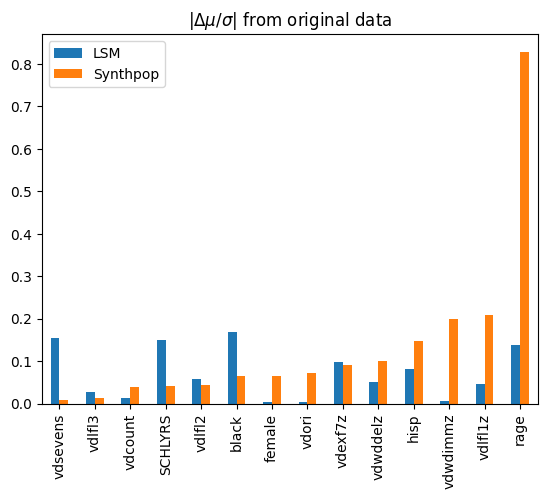

In [557]:
print('delta')
deltadf=pd.DataFrame({'LSM':deltaLSM,'Synthpop':deltaSynthpop}).sort_values('Synthpop')
deltadf.plot(kind='bar')
plt.gca().set_title('$| \Delta \mu / \sigma |$ from original data')
#print('std')
#pd.DataFrame({'D':Dv,'Dlsm':Dsv,'Dsynthpop':Dsynthpopv}).plot(kind='bar')
plt.savefig('complsmsynthpop_age65plus_p2.png',dpi=300)

In [481]:
dsynthpop.columns

Index(['rage', 'female', 'black', 'hisp', 'SCHLYRS', 'vdori', 'vdlfl1z',
       'vdlfl2', 'vdlfl3', 'vdwdimmz', 'vdwddelz', 'vdexf7z', 'vdsevens',
       'vdcount'],
      dtype='object')

In [482]:
feature_names

Index(['rage', 'female', 'black', 'hisp', 'SCHLYRS', 'vdori', 'vdlfl1z',
       'vdlfl2', 'vdlfl3', 'vdwdimmz', 'vdwddelz', 'vdexf7z', 'vdsevens',
       'vdcount'],
      dtype='object')

In [483]:
dsynthpop.vdwddelz.mean()

0.3985081652274783

In [484]:
D.vdwddelz.mean()

0.38469455667500035

In [485]:
Ds.vdwddelz.mean()

0.45998871831994315

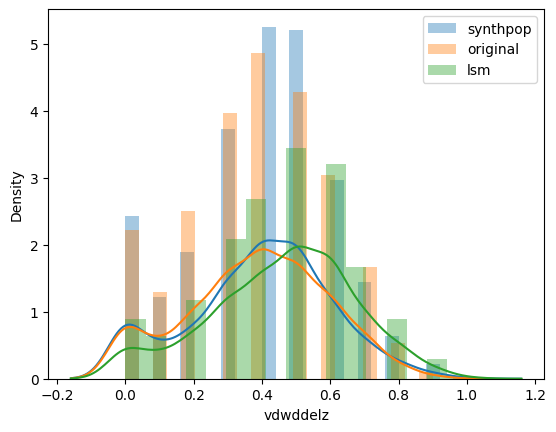

In [486]:
sns.distplot(dsynthpop.sample(1000).vdwddelz,label='synthpop')
sns.distplot(D.vdwddelz,label='original')
sns.distplot(Ds.vdwddelz,label='lsm')
plt.legend()

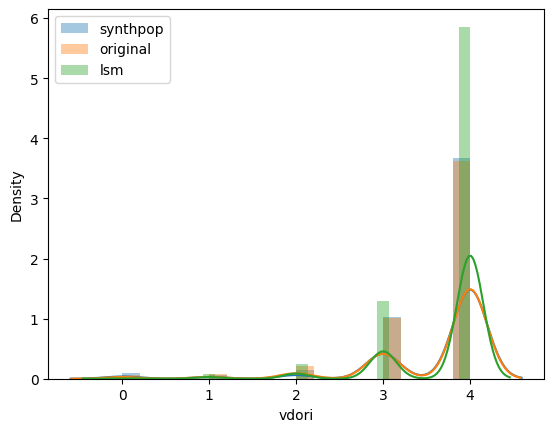

In [487]:
sns.distplot(dsynthpop.sample(1000).vdori,label='synthpop')
sns.distplot(D.vdori,label='original')
sns.distplot(Ds.vdori,label='lsm')
plt.legend()

In [488]:
D.corr(numeric_only=True)

,rage,female,black,hisp,SCHLYRS,vdori,vdlfl1z,vdlfl2,vdlfl3,vdwdimmz,vdwddelz,vdexf7z,vdsevens,vdcount
rage,1.000000,0.023920,-0.090866,-0.010090,-0.147915,-0.246746,-0.232113,-0.072278,-0.167416,-0.313901,-0.350140,-0.133218,-0.129975,-0.125305
female,0.023920,1.000000,0.089819,0.027095,-0.057944,-0.008606,-0.054600,0.017980,-0.048811,0.081201,0.097186,-0.088411,-0.119201,0.025605
black,-0.090866,0.089819,1.000000,-0.153217,-0.113718,-0.009633,-0.127138,-0.245324,-0.122592,-0.091681,-0.137013,-0.277475,-0.274888,-0.124383
hisp,-0.010090,0.027095,-0.153217,1.000000,-0.411050,-0.076778,-0.085692,-0.087756,-0.215512,-0.159809,-0.106722,-0.217525,-0.162865,-0.109191
SCHLYRS,-0.147915,-0.057944,-0.113718,-0.411050,1.000000,0.178122,0.366062,0.208978,0.340906,0.348924,0.324469,0.438922,0.418140,0.219045
vdori,-0.246746,-0.008606,-0.009633,-0.076778,0.178122,1.000000,0.269770,0.161416,0.397662,0.247025,0.312990,0.210159,0.274474,0.246092
vdlfl1z,-0.232113,-0.054600,-0.127138,-0.085692,0.366062,0.269770,1.000000,0.230707,0.341034,0.392874,0.407971,0.390944,0.332105,0.125520
vdlfl2,-0.072278,0.017980,-0.245324,-0.087756,0.208978,0.161416,0.230707,1.000000,0.265415,0.218212,0.237707,0.214282,0.232649,0.197985
vdlfl3,-0.167416,-0.048811,-0.122592,-0.215512,0.340906,0.397662,0.341034,0.265415,1.000000,0.338467,0.377848,0.327420,0.337726,0.236977
vdwdimmz,-0.313901,0.081201,-0.091681,-0.159809,0.348924,0.247025,0.392874,0.218212,0.338467,1.000000,0.750995,0.319606,0.335068,0.199279


In [489]:
gensamples_big=[qsample(s,model,steps=steps,alpha=.97,baseline_prob=getbp(s)) for s in tqdm(X[:9000])]
lsm_synthetic_df=pd.DataFrame(gensamples_big,columns=feature_names)
lsm_synthetic_df.to_csv('LSM_synthetic.csv')

100%|███████████████████████████████████████| 9000/9000 [07:04<00:00, 21.19it/s]


In [490]:
D

,rage,female,black,hisp,SCHLYRS,vdori,vdlfl1z,vdlfl2,vdlfl3,vdwdimmz,vdwddelz,vdexf7z,vdsevens,vdcount
HHID,,,,,,,,,,,,,,
030761,76.0,1.0,0.0,0.0,12.0,4.0,0.159125,2.0,2.0,0.699957,0.599975,0.594264,4.0,1.0
031552,78.0,0.0,0.0,0.0,17.0,4.0,0.352288,2.0,2.0,0.699957,0.699949,NaN,5.0,1.0
042943,74.0,1.0,0.0,0.0,14.0,4.0,0.261388,2.0,2.0,0.799936,0.699949,0.731376,4.0,1.0
502563,66.0,0.0,0.0,0.0,12.0,4.0,0.284113,2.0,2.0,0.599979,0.500000,0.599977,5.0,1.0
212567,85.0,1.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
056712,76.0,0.0,1.0,0.0,14.0,4.0,0.090951,0.0,2.0,0.599979,0.300051,0.457153,5.0,1.0
039654,67.0,1.0,0.0,0.0,12.0,4.0,0.272750,2.0,2.0,0.799936,0.699949,0.851349,5.0,1.0
012762,75.0,1.0,0.0,0.0,12.0,4.0,0.045501,2.0,2.0,0.500000,0.400025,0.685672,3.0,1.0


In [491]:
Dsynthpop.rage.mean(),Ds.rage.mean(),D.rage.mean()

(75.76400696507221, 66.85627586206897, 76.229)

In [492]:

def smd_nopool(df_orig: pd.DataFrame, df_syn: pd.DataFrame) -> pd.Series:
    """
    SMD(col) = (mean_syn - mean_orig) / sd_orig
    Computed for all numeric columns present in both DataFrames.
    Ignores NaNs (like R's na.rm=TRUE). Uses sample SD (ddof=1), like R's sd().
    """
    # numeric columns common to both
    common_cols = (
        df_orig.select_dtypes(include=[np.number]).columns
        .intersection(df_syn.select_dtypes(include=[np.number]).columns)
    )

    smd = {}
    for col in common_cols:
        x = df_orig[col].dropna()
        y = df_syn[col].dropna()

        if x.empty or y.empty:
            smd[col] = np.nan
            continue

        mean_orig = x.mean()
        sd_orig   = x.std(ddof=1)
        mean_syn  = y.mean()

        smd[col] = (mean_syn - mean_orig) / sd_orig if sd_orig != 0 else np.nan

    return pd.Series(smd, name="SMD_origSD").abs()

# Example
# smd_series = smd_two_dfs_orig_sd(df_orig, df_syn)
# print(smd_series)


<Axes: >

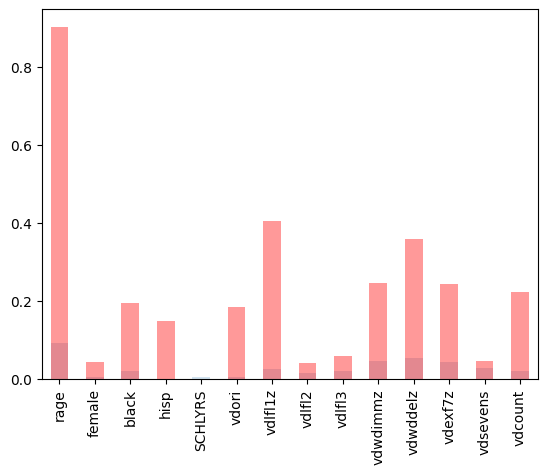

In [493]:
ax=smd_nopool(dsynthpop,df_[df_.rage>65]).plot(kind='bar',alpha=.2)
smd_nopool(Ds,D).plot(ax=ax,kind='bar',color='r',alpha=.4)

<Axes: >

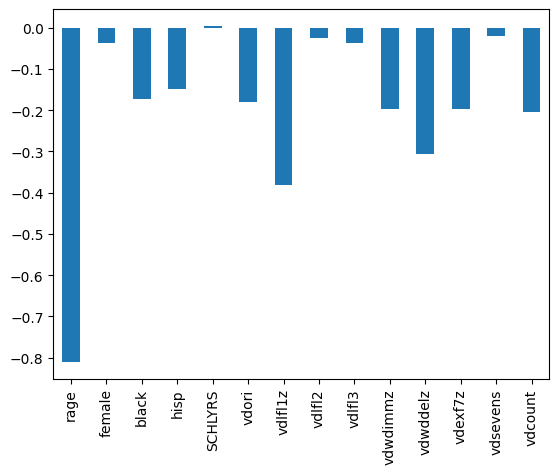

In [494]:
deltadf=(smd_nopool(dsynthpop,df_)-smd_nopool(Ds,D))
deltadf.plot(kind='bar')

In [495]:
smd_nopool(Ds,df_)

rage        0.924193
female      0.037874
black       0.200902
hisp        0.149829
SCHLYRS     0.013176
vdori       0.160424
vdlfl1z     0.400403
vdlfl2      0.021167
vdlfl3      0.074842
vdwdimmz    0.244948
vdwddelz    0.345861
vdexf7z     0.216954
vdsevens    0.057667
vdcount     0.240326
Name: SMD_origSD, dtype: float64

In [565]:
import pandas as pd
import numpy as np
from itertools import combinations

def max_mean_diff_condition(df, target_col, max_k=2):
    """
    Finds the condition (up to max_k conditioning variables) that maximizes the absolute difference
    in means of target_col across two subsets of the dataframe.
    
    Parameters
    ----------
    df : pd.DataFrame
        The dataset.
    target_col : str
        Name of the numeric target column.
    max_k : int
        Maximum number of conditioning variables to try.
    
    Returns
    -------
    dict : containing:
        - condition_cols: tuple of conditioning column names
        - condition_value_1: first subset values
        - condition_value_2: second subset values
        - mean_diff: absolute difference in means
        - mean_1, mean_2: means for the two subsets
    """
    df = df.dropna(subset=[target_col])
    cond_candidates = [c for c in df.columns if c != target_col]
    best_result = {
        "condition_cols": None,
        "condition_value_1": None,
        "condition_value_2": None,
        "mean_diff": -np.inf,
        "mean_1": None,
        "mean_2": None
    }
    
    for k in range(1, max_k+1):
        for cond_cols in tqdm(combinations(cond_candidates, k)):
            # Group by the condition(s)
            grouped = df.groupby(list(cond_cols))[target_col].mean()
            if len(grouped) < 2:
                continue
            # Compare every pair of groups
            for idx1 in tqdm(grouped.index):
                for idx2 in grouped.index:
                    if idx1 == idx2:
                        continue
                    m1, m2 = grouped.loc[idx1], grouped.loc[idx2]
                    diff = abs(m1 - m2)
                    if diff > best_result["mean_diff"]:
                        best_result.update({
                            "condition_cols": cond_cols,
                            "condition_value_1": idx1,
                            "condition_value_2": idx2,
                            "mean_diff": diff,
                            "mean_1": m1,
                            "mean_2": m2
                        })
    return best_result

In [ ]:
# Example usage:
result = max_mean_diff_condition(df_, target_col="vdwddelz", max_k=2)
print(result)

0it [00:00, ?it/s]
100%|█████████████████████████████████████████| 53/53 [00:00<00:00, 1346.72it/s]

100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 9962.72it/s]

100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 9686.61it/s]

100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 9289.71it/s]

100%|█████████████████████████████████████████| 18/18 [00:00<00:00, 3948.82it/s]

100%|██████████████████████████████████████████| 5/5 [00:00<00:00, 12024.95it/s]

100%|█████████████████████████████████████████| 53/53 [00:00<00:00, 1362.43it/s]
7it [00:00, 61.83it/s]
100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 12658.87it/s]

100%|███████████████████████████████████████████| 3/3 [00:00<00:00, 6598.28it/s]

100%|█████████████████████████████████████████| 11/11 [00:00<00:00, 5292.19it/s]

100%|█████████████████████████████████████████| 29/29 [00:00<00:00, 2535.70it/s]

100%|███████████████████████████████████████████| 6/6 [00

In [567]:
result

{'condition_cols': ('rage', 'vdlfl1z'),
 'condition_value_1': (55.0, 0.4318250869357767),
 'condition_value_2': (67.0, 0.5113624855107038),
 'mean_diff': 0.9997456977429741,
 'mean_1': 0.00012715112851288216,
 'mean_2': 0.999872848871487}